# **Estatísticas que você Deveria Mostrar para seu Amigo Antivacina**
### _Por: Victorio H. S. Maculan_

Com a popularização da internet nós entramos na era das Fake News (Notícias falsas) e informações inverídicas, causando grandes mudanças sociais, politicas e econômicas. Na situação social, as falsas informações aumentaram a força do movimento antivacina (Além de outros tipos de negligência científica), causando várias doenças se espalharem e a perca de muitas vidas.

**Em diversas epidemias e pandemias as vacinas salvaram muitas vidas, e isso é o que analisaremos hoje: A relação da vacina com a quantidade de casos e mortes (Durante três epidemias/pandemias) e como o movimento antivacina influênciou esses números.**

Primeiramente, vamos deixar tudo pronto.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import locale

In [2]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8'); # Para lidar com formatos de dados internacionais.

## **A pandemia de COVID-19**
Vamos começar com a mais recente pandemia: [A pademia de COVID-19 de 2019](https://en.wikipedia.org/wiki/COVID-19_pandemic).

A começar pelos dados de casos e morte na europa, onde a vacinação inicou.

In [4]:
covid = pd.read_csv('../databases/covid19-cases-and-deaths.csv', parse_dates=['Date_reported'])
covid_vacs = pd.read_csv('../databases/covid19-vaccination-data.csv', index_col='COUNTRY')

In [5]:
global_cases = covid.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum()
global_deaths = covid.groupby(['WHO_region', 'Date_reported'])['New_deaths'].sum()

europe_cases = global_cases.loc['EURO']
europe_deaths = global_deaths.loc['EURO']

europe_cases.name = 'EURO Cases'
europe_deaths.name = 'EURO Deaths'

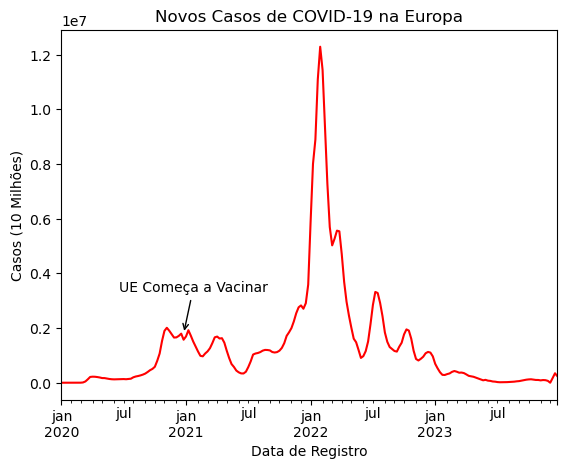

In [6]:
graph = europe_cases.plot(title='Novos Casos de COVID-19 na Europa', 
                          xlabel='Data de Registro', ylabel='Casos (10 Milhões)',
                          color='red');
graph.annotate('UE Começa a Vacinar', 
               xy=('12-21-2020', europe_cases.loc['2020-12-20']), # Registro mais próximo de 21-12-2020 (Para o eixo y)
               xytext=('06-21-2020', europe_cases.loc['2020-12-06']*2), # Posição do texto 
               arrowprops=dict(color='black', arrowstyle='->'));

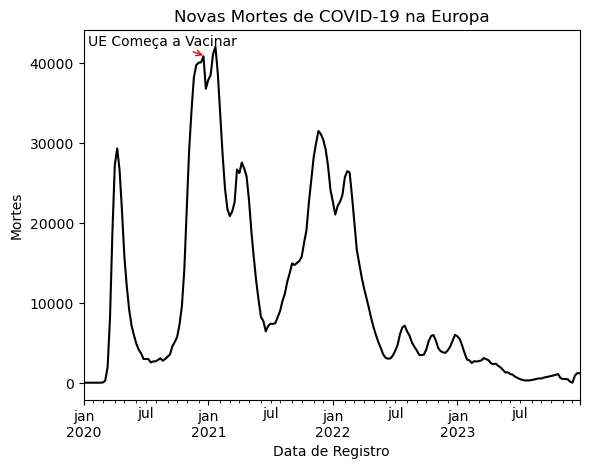

In [7]:
graph2 = europe_deaths.plot(title='Novas Mortes de COVID-19 na Europa', 
                  xlabel='Data de Registro', ylabel='Mortes',
                 color='black')
graph2.annotate('UE Começa a Vacinar', 
               xy=('12-21-2020', europe_deaths.loc['2020-12-20']), # Registro mais próximo de 21-12-2020 (Para o eixo y)
               xytext=('01-15-2020', 42300), # Posição do texto 
               arrowprops=dict(color='red', arrowstyle='->'));

O primeiro pais a começar a vacinar seus cidadões foi o Reino Unido no dia 08-12-2020[\*](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_Kingdom#:~:text=Vaccinations%20began%20on%208%20December%202020).

Alguns dias depois, no dia 21-12-2020 outros países da União Europeia (UE) também inciaram as vacinações. Esse dia está indicado como "UE Começa a Vacinar" em ambos os gráficos.

No primeiro gráfico (Que mostra os novos casos de COVID-19) é observável que não há nenhuma mudança significativa no número de casos depois do início da vacinação, de fato, **a vacina contra a COVID-19 não impede a infecção, mas diminui as chances de morte**.

Já no segundo gráfico (Mostrando as novas mortes de COVID-19), após a vacinação, é perceptível uma queda imediata no número de mortes, que, excluindo duas pequenas concavidades, continua descendo até Julho de 2021.

Tudo fica mais impresionante quando consideramos que **no período de pico de novos casos (Julho de 2021 até Julho de 2022) o número total de casos foi aproximadamente 3,3 vezes maior que o mesmo período do ano passado, onde a vacinação havia apenas começado (Julho de 2020 até Julho de 2021), entretanto, o número de mortes foi aproximadamente 1,2 vezes menor.**

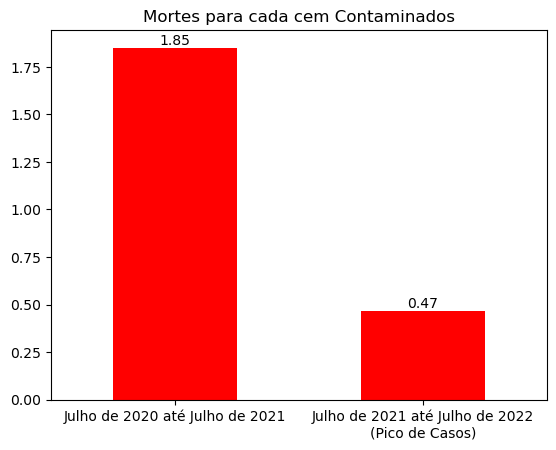

In [8]:
peak1 = pd.merge(europe_cases['2020-07':'2021-07'], europe_deaths['2020-07':'2021-07'],
                right_index=True, left_index=True).sum()
peak2 = pd.merge(europe_cases['2021-07':'2022-07'], europe_deaths['2021-07':'2022-07'],
                right_index=True, left_index=True).sum()

peaks_pct = pd.Series({'peak1': peak1['EURO Deaths'] * 100 / peak1['EURO Cases'], 
                       'peak2': peak2['EURO Deaths'] * 100 / peak2['EURO Cases']})

graph3 = peaks_pct.plot.bar(title='Mortes para cada cem Contaminados', color='red')
graph3.set_xticklabels(['Julho de 2020 até Julho de 2021', 'Julho de 2021 até Julho de 2022\n(Pico de Casos)'], rotation=360)
plt.bar_label(graph3.containers[0], peaks_pct.round(2));

**Agora, vamos observar os países com maior número de mortes de COVID-19 e suas taxas de vacinação**, eles são, respectivamente, Estados Unidos, Brasil, Índia, Rússia e México.

In [10]:
columns = ['PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE_PER100', 
           'PERSONS_BOOSTER_ADD_DOSE_PER100']

global_vacs = covid_vacs[columns]
global_vacs.columns = ['1+ Doses', 'Última Dose', 'Dose Adicional']

deaths_by_country = covid.groupby('Country')['New_deaths'].sum()
deaths_by_country.sort_values(ascending=False, inplace=True)

most_aff_deaths = deaths_by_country[0:5]
most_aff_vacs = global_vacs.loc[most_aff_deaths.index]

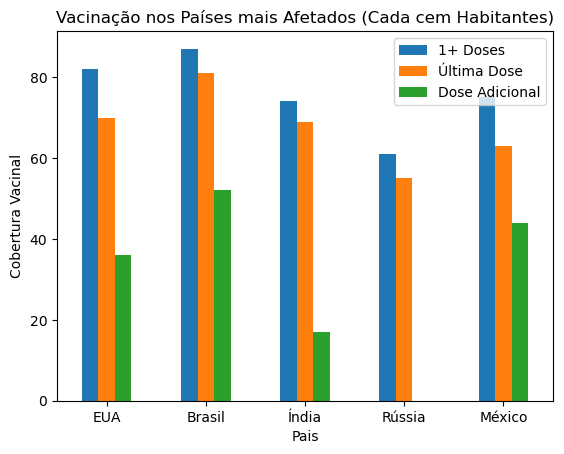

In [14]:
graph4 = most_aff_vacs.plot.bar(title='Vacinação nos Países mais Afetados (Cada cem Habitantes)', 
                                ylabel='Cobertura Vacinal', xlabel='Pais')
graph4.set_xticklabels(['EUA', 'Brasil', 'Índia', 'Rússia', 'México'], rotation=360);

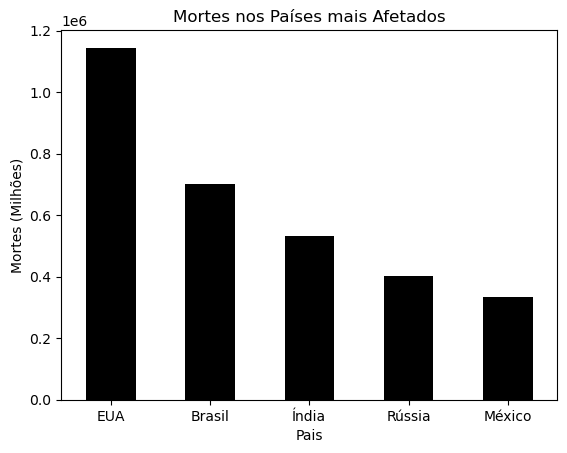

In [16]:
graph5 = most_aff_deaths.plot.bar(title='Mortes nos Países mais Afetados', color='black', 
                                  ylabel='Mortes (Milhões)', xlabel='Pais')
graph5.set_xticklabels(['EUA', 'Brasil', 'Índia', 'Rússia', 'México'], rotation=360);

O primeiro gráfico mostra a taxa de vacinação dos países mais afetados. É perceptível que a taxa de vacinação não é muito impresionante. **De fato, o pais mais vacinado da lista, o Brasil, está apenas em 31° lugar no ranking mundial de vacinação, seguido pelos Estados Unidos (55° lugar), México (89ª lugar), Índia (98° lugar) e Rússia (120ª lugar).**

Outro detalhe importante é que todos esses países tem um forte insentificador de ideias antivacina, como [um movimento antivacina ativo](https://en.wikipedia.org/wiki/COVID-19_vaccine_hesitancy_in_the_United_States), [um discurso antivacina de um figura pública importante](https://www.bbc.com/news/technology-52106321), [problemas sociais e crenças ideológicas/religiosas](https://carnegieindia.org/2022/04/04/combating-vaccine-hesitancy-in-india-pub-86795#:~:text=Other%20obstacles%20include%20linguistic%20barriers%20to%20access%20appropriate%20information%2C%20religious%20and%20ideological%20beliefs%2C%20difficulty%20reaching%20the%20vaccination%20centers%2C%20inequitable%20access%20to%20the%20health%20system%2C%20and%20mistrust%20in%20the%20system.), ou até [uma preferência por medicina alternativa](https://www.thinkglobalhealth.org/article/why-arent-russians-getting-vaccinated#:~:text=The%C2%A0anti%2Dvaccine%20furor%20of%20the%20late%201980s%20found%20fertile%20ground%C2%A0in%20a%20society%C2%A0with%C2%A0deep%20historical%20roots%C2%A0in%20alternative%20medicine.).

No segundo gráfico, apenas para comparação, estão listadas as mortes nos países mais afetados.

In [29]:
data = covid_vacs.reset_index()[['COUNTRY', 'TOTAL_VACCINATIONS_PER100']]

data.sort_values('TOTAL_VACCINATIONS_PER100', ascending=False, inplace=True)
data.set_index('COUNTRY', inplace=True)
data['POSIÇÃO NO RANKING GLOBAL'] = np.arange(1, len(data)+1)

most_aff = data.loc[most_aff_vacs.index]
most_aff.sort_values('TOTAL_VACCINATIONS_PER100', ascending=False, inplace=True)

most_aff.rename(columns={'TOTAL_VACCINATIONS_PER100': 'TOTAL DE VACINAÇÃO PARA CADA 100 PESSOAS'}, inplace=True)
most_aff.index = ['Brasil', 'EUA', 'México', 'Índia', 'Rússia']
most_aff.index.name = 'Pais'

most_aff

,TOTAL DE VACINAÇÃO PARA CADA 100 PESSOAS,POSIÇÃO NO RANKING GLOBAL
Pais,,
Brasil,243.0,31
EUA,215.0,55
México,173.0,89
Índia,160.0,98
Rússia,128.0,120


## **Epidemia de Sarampo no Brasil**
Vamos dar uma olhada na [Epidemia Brasileira de Sarampo de 2018](https://en.wikipedia.org/wiki/Measles#Brazil).

In [20]:
measles = pd.read_excel('../databases/measles-brazil.xlsx', dtype='string')
measles = measles.iloc[0][2:]
measles.sort_index(ascending=True, inplace=True)
measles.dropna(inplace=True)

measles = measles.map(locale.atof)

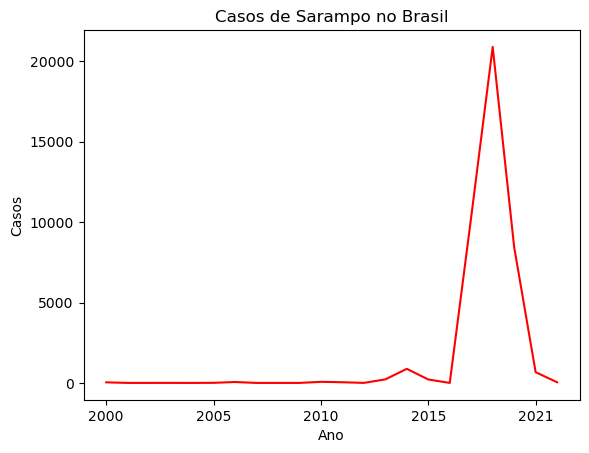

In [21]:
graph6 = measles.plot(title='Casos de Sarampo no Brasil', xlabel='Ano', ylabel='Casos', 
                      color='red');

Podemos ver no gráfico acima que o sarampo estava quase completemente eradicado no Brasil até 2018, quando os casos aumentaram substanciamente e atingiram seu pico em 2019 com mais de vinte mil infecções. Felizmente, os casos diminuiram durante 2020 e 2021 e no final de 2022 o sarampo estava quase eradicado novamente.

**Não por uma coincidência, os casos passaram a aumentar quando a cobertura vacinal caiu de 92% para 76%[\*](https://g1.globo.com/bemestar/blog/ana-escobar/post/2020/01/01/por-que-o-sarampo-voltou.ghtml#:~:text=A%20cobertura%20vacinal%20caiu%20nestes%20%C3%BAltimos%20anos%2C%20de%2092%25%20para%2076%25)**, e então, sem nenhum aumento na cobertura, os casos começaram a dimuir por conta das [medidas de distânciamento social da pandemia de COVID-19](https://www.paho.org/en/news/9-2-2023-vaccination-coverage-declines-paho-warns-potential-measles-outbreaks#:~:text=confirmed%20cases%20declined%20and%20in%202022%2C%20thanks%20to%20the%20social%20distancing%20measures%20imposed%20during%20the%20COVID%2D19%20pandemic).

## **Febre Amarela na Africa**
Por último, mas não menos importante, vamos checar a situação da [Febre Amarela](https://en.wikipedia.org/wiki/Yellow_fever) na Africa.

In [22]:
yf = pd.read_excel('../databases/yf-africa.xlsx', dtype='string')
yf = yf.iloc[0][2:]
yf.sort_index(ascending=True, inplace=True)
yf = yf.map(locale.atof)

yf_vacs = pd.read_excel('../databases/yf-vacs-africa.xlsx')
yf_vacs = yf_vacs.set_index('YEAR')['COVERAGE'][:2000]
yf_vacs.sort_index(ascending=True, inplace=True)

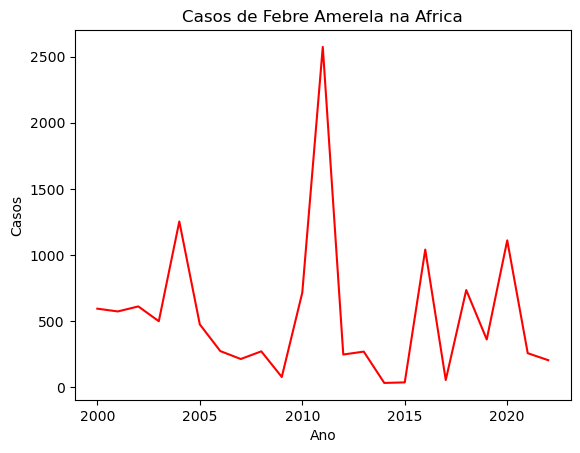

In [23]:
yf.plot(title='Casos de Febre Amerela na Africa', xlabel='Ano', ylabel='Casos',
       color='red');

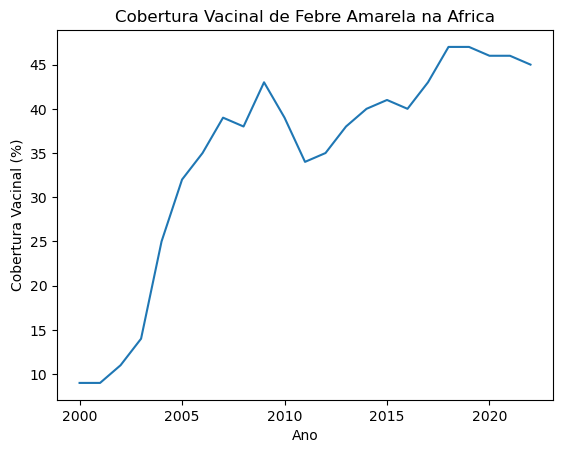

In [24]:
yf_vacs.plot(title='Cobertura Vacinal de Febre Amarela na Africa', xlabel='Ano', 
              ylabel='Cobertura Vacinal (%)');

Analisando ambos os gráficos, é perceptível que eles seguem um ao outro. Depois de um pico de infecções em 2004, [a OMS intensificou suas operações na Africa](https://iris.who.int/bitstream/handle/10665/241250/WER8350_450-458.PDF), ou seja, a cobertura vacinal cresceu durante 2004, enquanto o virus se espalhava.

Em 2005 a cobertura vacinal continuava a crescer enquanto as infecções diminuiam, e isso continuou acontecendo até 2010, quando a cobertura vacinal diminuiu e as infecções começaram a aumentar. **No ano seguinte (2011) temos o maior número de casos registrado e a menor vacinação desde 2005**

Depois de 2011 o número de casos diminuiu enquanto a cobertura aumentava. Em 2015 muita oscilação inicia por conta do [surto de Febre Amarela na Angola](https://reliefweb.int/report/democratic-republic-congo/yellow-fever-outbreak-angola-and-democratic-republic-congo-ends).

## **_Conclusão_**

**Com essas estatísticas podemos ver que índices baixos de vacinação resultam em um maior número de casos/mortes, e que o movimento antivacina pode influenciar na taxa de vacinação, consequentemente, causando mais fatalidades.** No fim, se vacinar ou não é uma escolha individual, entretanto, propagar informações falsas é um crime e deve ser punido como um.

## **_Uma Mensagem para Pessoas Antivacinas_**

Pense por um segundo sobre todas essas teorias que você ouviu sobre as vacinas. Talvez você ouviu que vacinas apenas servem para encher os bolsos de grande empresas farmaceuticas, mas então porque todos os médicos recomendam elas? Ou então você ouviu que vacinas matam ou causam doenças, mas agora pense em todas as pessoas que se vacinaram e não morreram ou adoeceram. Tome seu tempo para pensar em todos os motivos de se vacinar ou não.

No fim, se vacinar ou não é uma escolha sua, entretanto, espalhar noticias falsas que você ou outras pessoas criaram é um crime e pode causar fatalidades. **Então não seja um assasino, não espalhe notícias falsas**.

## **_Referencias_**

Todas as informações foram tiradas de fontes confiáveis, **muitas delas estão _hyperlinkadas_ com os textos**.

Os bancos de dados foram todos coletados da OMS (Organização Mundial da Saúde):

https://data.who.int/dashboards/covid19/data

https://immunizationdata.who.int/pages/incidence/MEASLES.html?CODE=BRA&YEAR=

https://immunizationdata.who.int/pages/incidence/MUMPS.html?CODE=Global&DISEASE=MUMPS

Algumas fontes secundárias foram utilizadas:

https://en.wikipedia.org/wiki/History_of_COVID-19_vaccine_development

https://www.dovepress.com/a-global-map-of-covid-19-vaccine-acceptance-rates-per-country-an-updat-peer-reviewed-fulltext-article-JMDH